In [7]:
%load_ext autoreload
%autoreload 2

In [8]:
from adata_hf_datasets.utils import setup_logging

setup_logging()

/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/pysradb/utils.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


<RootLogger root (INFO)>

In [14]:
import anndata

# adata_path = "../data/demo/rna_seq.h5ad"
# adata_path = "../data/RNA/raw/train/geo_7k.h5ad"
# adata_path = "../data/RNA/raw/test/tabula_sapiens_bone_marrow.h5ad"
adata_path = "../data/RNA/processed/train/geo_700k/train/chunk_8.h5ad"

In [15]:
adata = anndata.read_h5ad(adata_path)

In [ ]:
from adata_hf_datasets.initial_embedder import InitialEmbedder

embedder = InitialEmbedder(method="hvg")
embedder.prepare(adata=adata)
embedder.embed(adata=adata, batch_key="study")

2025-05-06 14:42:17,840 - adata_hf_datasets.initial_embedder - INFO - Initialized InitialEmbedder(method=hvg, embedding_dim=64, requires_mem_adata=True)
2025-05-06 14:42:17,840 - adata_hf_datasets.initial_embedder - INFO - Preparing embedder 'hvg' with file None
2025-05-06 14:42:17,841 - adata_hf_datasets.initial_embedder - INFO - Normalizing and log-transforming data before HVG selection.
2025-05-06 14:42:17,841 - adata_hf_datasets.pp.utils - INFO - Checking if data in adata.X appears log-transformed and normalized.
2025-05-06 14:42:19,766 - adata_hf_datasets.pp.utils - INFO - Data does not appear to be normalized. Applying sc.pp.normalize_total() in place.
2025-05-06 14:42:20,212 - adata_hf_datasets.pp.utils - INFO - Data already appears to be log-transformed.
2025-05-06 14:42:20,477 - adata_hf_datasets.initial_embedder - INFO - Embedding method: hvg
2025-05-06 14:42:20,477 - adata_hf_datasets.initial_embedder - INFO - Selecting top 64 highly variable genes.


AttributeError: 'NoneType' object has no attribute 'X'

/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scipy/sparse/_index.py:197: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


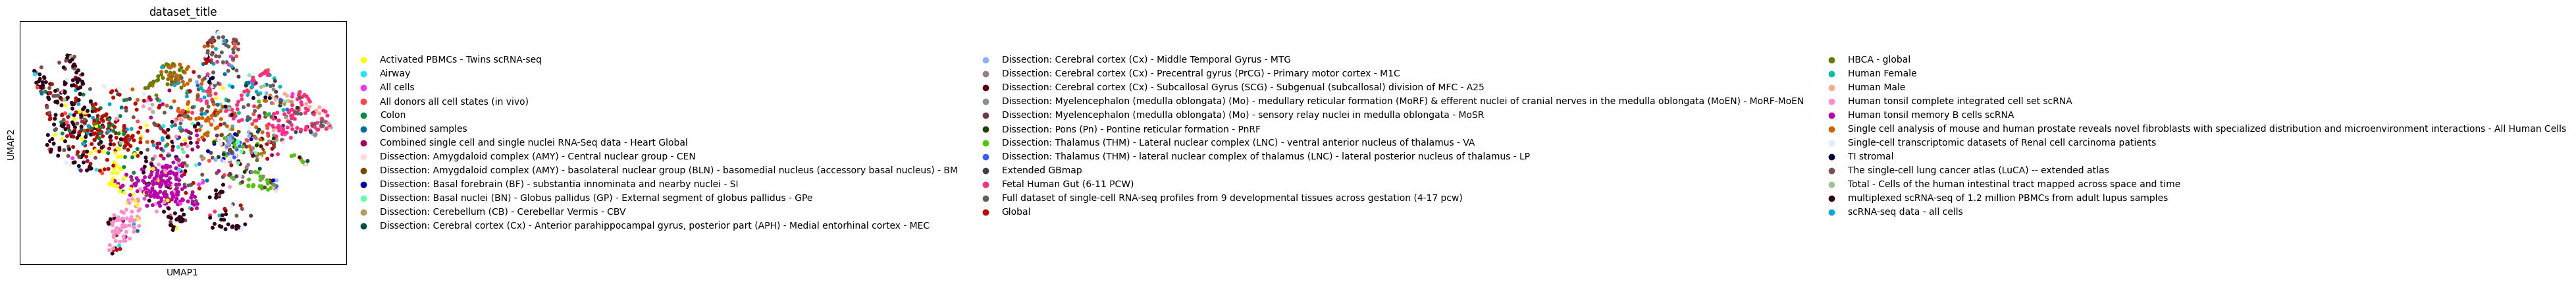

In [6]:
import scanpy as sc

sc.pp.neighbors(adata, use_rep="X_hvg")
sc.tl.umap(adata)
sc.pl.umap(adata, color="dataset_title")

## The previous approach: Problem was that fitting scvi on the training data and later on the inference data is neither coherent nor a use that aligns with a foundation model approach that is aimed for.

In [3]:
adata = anndata.read_h5ad("../data/demo/rna_seq.h5ad")

In [69]:
from adata_hf_datasets.initial_embedder import InitialEmbedder

embedder = InitialEmbedder(method="scvi")
embedder.fit(adata, batch_key="study")
adata = embedder.embed(adata)

2025-02-11 13:36:08,947 - adata_hf_datasets.initial_embedder - INFO - Fitting method 'scvi' with embedding_dim=64
2025-02-11 13:36:08,947 - adata_hf_datasets.initial_embedder - INFO - Setting up scVI model with embedding_dim=64
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/data/fields/_dataframe_field.py:186: UserWarning: Category 0 in adata.obs['_scvi_batch'] has fewer than 3 cells. Models may not train properly.
  categorical_mapping = _make_column_categorical(
2025-02-11 13:36:08,979 - adata_hf_datasets.initial_embedder - INFO - Training scVI model.
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/train/_trainrunner.py:69: UserWarning: `accelerator` has been automatically se

Training:   0%|          | 0/10 [00:00<?, ?it/s]

/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].

In [70]:
adata.obsm["X_scvi"]

array([[ 0.0174264 ,  0.13381286,  0.2123419 , ..., -0.02693812,
        -0.5777042 , -0.19374533],
       [ 0.19993295, -0.33171532,  0.5399544 , ..., -1.2446675 ,
        -0.51235235, -0.26110113],
       [ 0.01079873, -0.02964801,  0.28322223, ..., -0.7336697 ,
        -0.85904235,  0.12404964],
       ...,
       [ 0.01999943, -1.40511   ,  1.8408469 , ..., -3.3454187 ,
        -1.9526563 ,  0.04684396],
       [-0.24815464,  0.2701683 ,  0.01768555, ..., -0.2796876 ,
        -0.95797986,  0.03571127],
       [-0.02856737, -0.51765317,  0.5305606 , ..., -1.3493755 ,
        -1.2734039 ,  0.3960248 ]], dtype=float32)

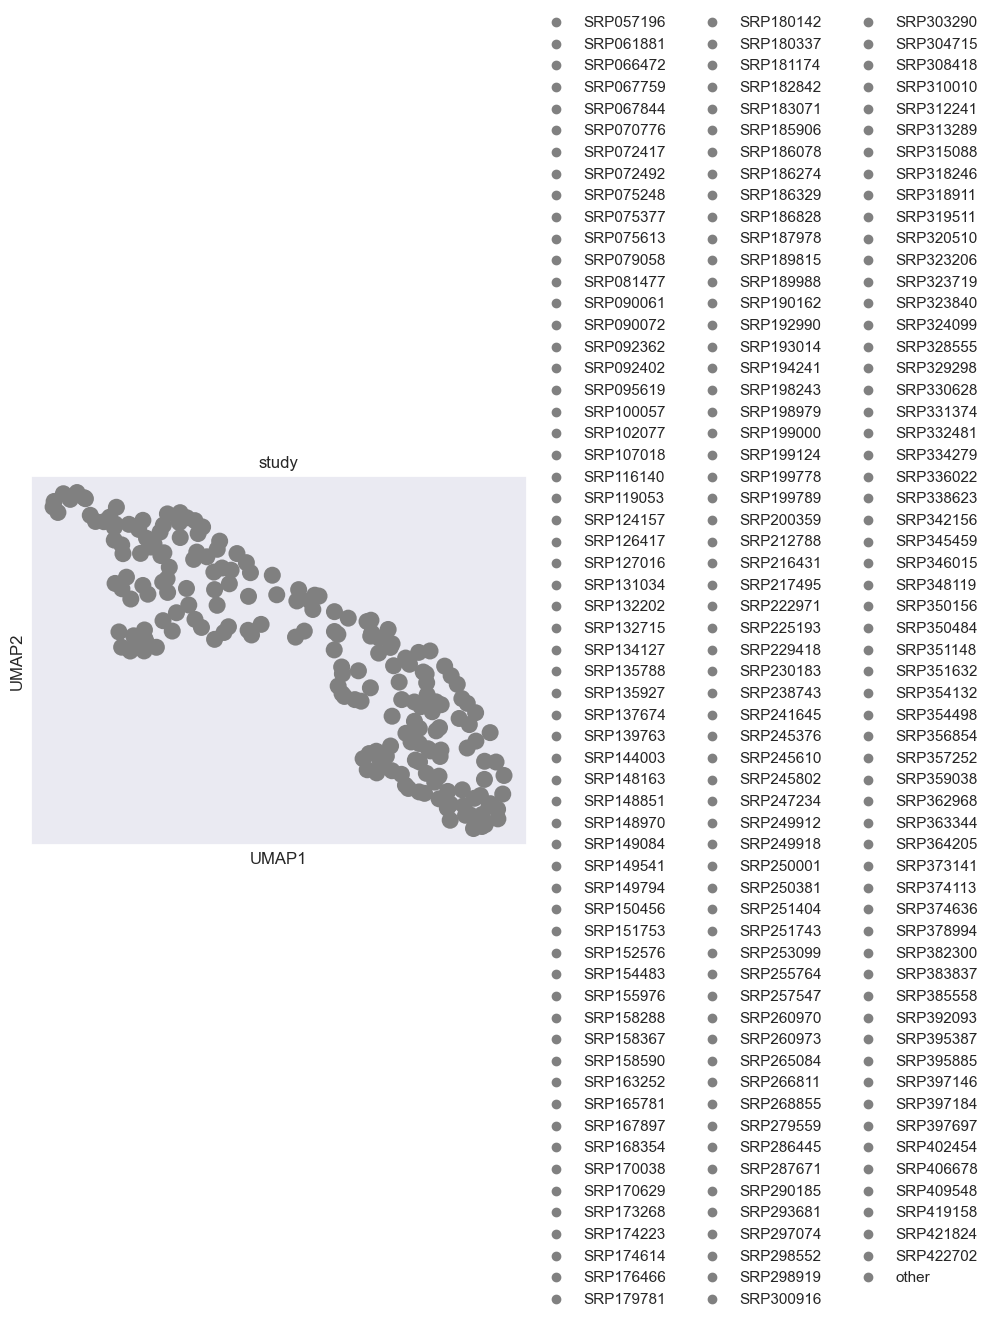

In [72]:
import scanpy as sc

sc.pp.neighbors(adata, use_rep="X_scvi")
sc.tl.umap(adata)
sc.pl.umap(adata, color="study")

In [10]:
adata = anndata.read_h5ad("../data/demo/rna_seq.h5ad", backed="r")